<a href="https://colab.research.google.com/github/bispado/TREINAMENTO-COM-KERAS/blob/main/exercicio2_california_housing.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Exercício 2 - Regressão com California Housing Dataset

## Objetivo
Treinar uma rede neural em Keras para prever o valor médio das casas na Califórnia e comparar com modelos do scikit-learn.

### Dataset
- **California Housing Dataset**: Dataset com informações sobre habitação na Califórnia
- **Target**: Valor médio das casas (em centenas de milhares de dólares)
- **Features**: 8 atributos (renda média, idade média das casas, população, etc.)

### Integrantes
- Vinicius Murtinho Vicente - RM551151
- Lucas Barreto Consentino - RM557107  
- Gustavo Bispo Cordeiro - RM558515


In [1]:
# Importando bibliotecas necessárias
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.datasets import fetch_california_housing
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
from keras.models import Sequential
from keras.layers import Dense
import warnings
warnings.filterwarnings('ignore')

# Configuração para visualização
plt.style.use('default')
sns.set_palette("husl")
%matplotlib inline


## 1. Carregamento e Exploração dos Dados


In [2]:
# Carregando o California Housing Dataset
housing = fetch_california_housing()

# Criando DataFrame
data = pd.DataFrame(housing.data, columns=housing.feature_names)
data['target'] = housing.target

print("Shape do dataset:", data.shape)
print("\nColunas do dataset:")
print(data.columns.tolist())
print("\nPrimeiras 5 linhas:")
data.head()


Shape do dataset: (20640, 9)

Colunas do dataset:
['MedInc', 'HouseAge', 'AveRooms', 'AveBedrms', 'Population', 'AveOccup', 'Latitude', 'Longitude', 'target']

Primeiras 5 linhas:


,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude,target
0,8.3252,41.0,6.984127,1.023810,322.0,2.555556,37.88,-122.23,4.526
1,8.3014,21.0,6.238137,0.971880,2401.0,2.109842,37.86,-122.22,3.585
2,7.2574,52.0,8.288136,1.073446,496.0,2.802260,37.85,-122.24,3.521
3,5.6431,52.0,5.817352,1.073059,558.0,2.547945,37.85,-122.25,3.413
4,3.8462,52.0,6.281853,1.081081,565.0,2.181467,37.85,-122.25,3.422


In [3]:
# Informações sobre o dataset
print("Informações gerais:")
print(data.info())
print("\nEstatísticas descritivas:")
data.describe()


Informações gerais:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20640 entries, 0 to 20639
Data columns (total 9 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   MedInc      20640 non-null  float64
 1   HouseAge    20640 non-null  float64
 2   AveRooms    20640 non-null  float64
 3   AveBedrms   20640 non-null  float64
 4   Population  20640 non-null  float64
 5   AveOccup    20640 non-null  float64
 6   Latitude    20640 non-null  float64
 7   Longitude   20640 non-null  float64
 8   target      20640 non-null  float64
dtypes: float64(9)
memory usage: 1.4 MB
None

Estatísticas descritivas:


,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude,target
count,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000
mean,3.870671,28.639486,5.429000,1.096675,1425.476744,3.070655,35.631861,-119.569704,2.068558
std,1.899822,12.585558,2.474173,0.473911,1132.462122,10.386050,2.135952,2.003532,1.153956
min,0.499900,1.000000,0.846154,0.333333,3.000000,0.692308,32.540000,-124.350000,0.149990
25%,2.563400,18.000000,4.440716,1.006079,787.000000,2.429741,33.930000,-121.800000,1.196000
50%,3.534800,29.000000,5.229129,1.048780,1166.000000,2.818116,34.260000,-118.490000,1.797000
75%,4.743250,37.000000,6.052381,1.099526,1725.000000,3.282261,37.710000,-118.010000,2.647250
max,15.000100,52.000000,141.909091,34.066667,35682.000000,1243.333333,41.950000,-114.310000,5.000010


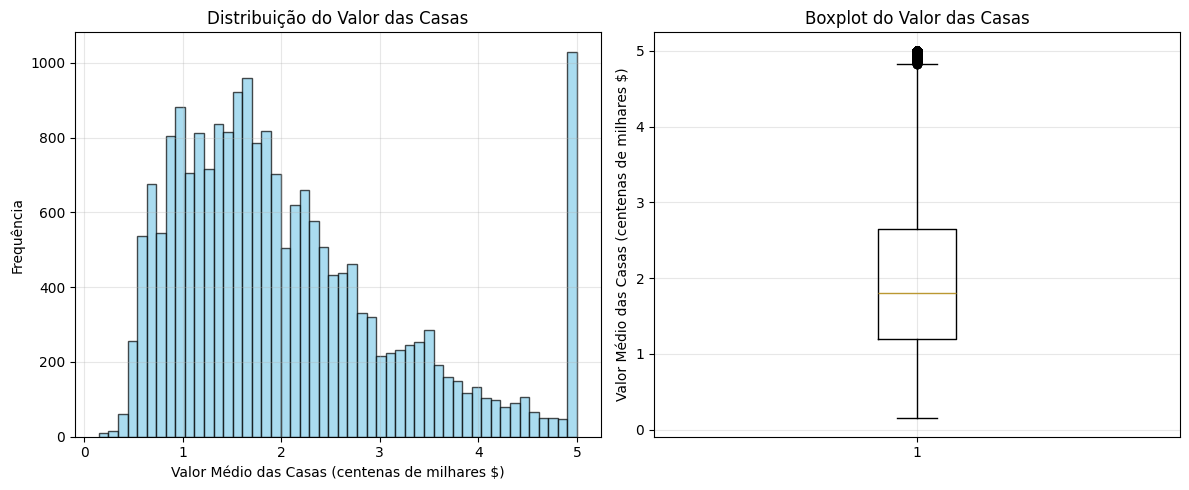

Valor médio: $2.07
Desvio padrão: $1.15
Valor mínimo: $0.15
Valor máximo: $5.00


In [4]:
# Visualização da distribuição do target (valor das casas)
plt.figure(figsize=(12, 5))

plt.subplot(1, 2, 1)
plt.hist(data['target'], bins=50, alpha=0.7, color='skyblue', edgecolor='black')
plt.title('Distribuição do Valor das Casas')
plt.xlabel('Valor Médio das Casas (centenas de milhares $)')
plt.ylabel('Frequência')
plt.grid(True, alpha=0.3)

plt.subplot(1, 2, 2)
plt.boxplot(data['target'])
plt.title('Boxplot do Valor das Casas')
plt.ylabel('Valor Médio das Casas (centenas de milhares $)')
plt.grid(True, alpha=0.3)

plt.tight_layout()
plt.show()

print(f"Valor médio: ${data['target'].mean():.2f}")
print(f"Desvio padrão: ${data['target'].std():.2f}")
print(f"Valor mínimo: ${data['target'].min():.2f}")
print(f"Valor máximo: ${data['target'].max():.2f}")


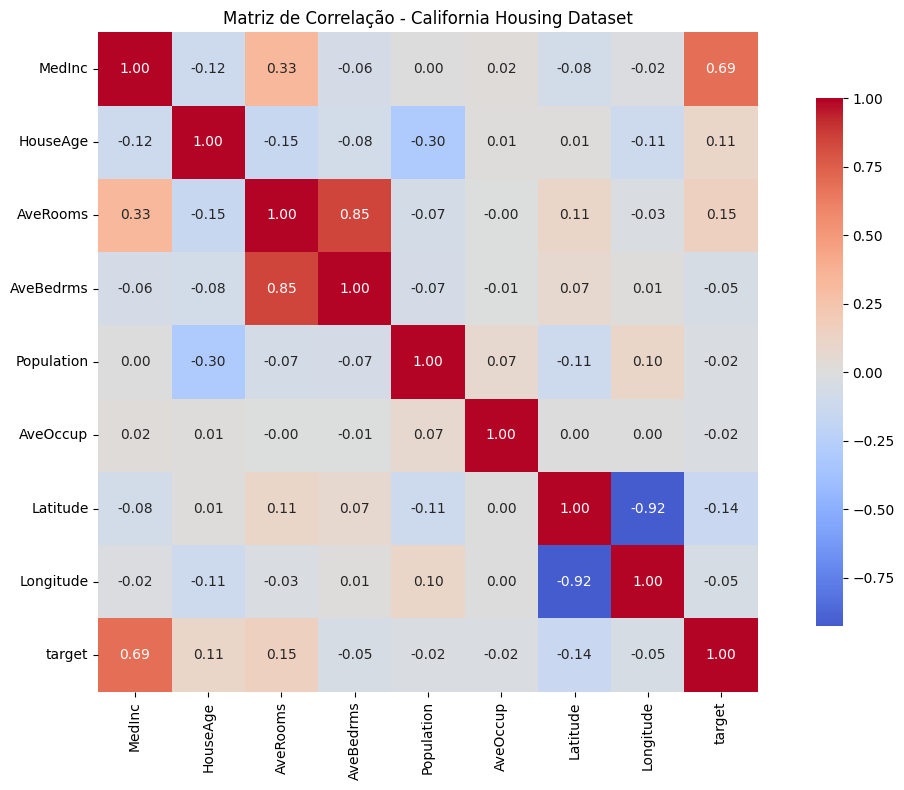

Correlações com o valor das casas:
target        1.000000
MedInc        0.688075
AveRooms      0.151948
HouseAge      0.105623
AveOccup     -0.023737
Population   -0.024650
Longitude    -0.045967
AveBedrms    -0.046701
Latitude     -0.144160
Name: target, dtype: float64


In [5]:
# Análise de correlação entre features e target
plt.figure(figsize=(12, 8))
correlation_matrix = data.corr()
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', center=0,
            square=True, fmt='.2f', cbar_kws={'shrink': 0.8})
plt.title('Matriz de Correlação - California Housing Dataset')
plt.tight_layout()
plt.show()

# Correlações com o target
target_corr = correlation_matrix['target'].sort_values(ascending=False)
print("Correlações com o valor das casas:")
print(target_corr)


## 2. Pré-processamento dos Dados


In [6]:
# Separando features (X) e target (y)
X = data.drop('target', axis=1)
y = data['target']

print("Shape de X:", X.shape)
print("Shape de y:", y.shape)
print("\nFeatures:")
print(X.columns.tolist())


Shape de X: (20640, 8)
Shape de y: (20640,)

Features:
['MedInc', 'HouseAge', 'AveRooms', 'AveBedrms', 'Population', 'AveOccup', 'Latitude', 'Longitude']


In [7]:
# Divisão dos dados em treino e teste
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)

print("Dados de treino - X:", X_train.shape, "y:", y_train.shape)
print("Dados de teste - X:", X_test.shape, "y:", y_test.shape)

# Estatísticas do target nos conjuntos de treino e teste
print(f"\nTarget - Treino: Média={y_train.mean():.2f}, Std={y_train.std():.2f}")
print(f"Target - Teste: Média={y_test.mean():.2f}, Std={y_test.std():.2f}")


Dados de treino - X: (16512, 8) y: (16512,)
Dados de teste - X: (4128, 8) y: (4128,)

Target - Treino: Média=2.07, Std=1.16
Target - Teste: Média=2.06, Std=1.14


In [8]:
# Normalização das features usando StandardScaler
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

print("Features normalizadas:")
print("Treino - Min:", X_train_scaled.min(), "Max:", X_train_scaled.max())
print("Teste - Min:", X_test_scaled.min(), "Max:", X_test_scaled.max())

# Verificando se há valores NaN ou infinitos
print(f"\nValores NaN no treino: {np.isnan(X_train_scaled).sum()}")
print(f"Valores NaN no teste: {np.isnan(X_test_scaled).sum()}")
print(f"Valores infinitos no treino: {np.isinf(X_train_scaled).sum()}")
print(f"Valores infinitos no teste: {np.isinf(X_test_scaled).sum()}")


Features normalizadas:
Treino - Min: -2.377207142428577 Max: 107.11644677509909
Teste - Min: -2.2974302308460617 Max: 76.1077409236129

Valores NaN no treino: 0
Valores NaN no teste: 0
Valores infinitos no treino: 0
Valores infinitos no teste: 0


## 3. Modelo de Rede Neural com Keras


In [9]:
# Criando o modelo de rede neural para regressão
model = Sequential()

# Primeira camada oculta (64 neurônios, ReLU)
model.add(Dense(64, input_dim=X_train_scaled.shape[1], activation='relu'))

# Segunda camada oculta (32 neurônios, ReLU)
model.add(Dense(32, activation='relu'))

# Terceira camada oculta (16 neurônios, ReLU)
model.add(Dense(16, activation='relu'))

# Camada de saída (1 neurônio para regressão, Linear)
model.add(Dense(1, activation='linear'))

# Compilação do modelo
model.compile(
    loss='mse',
    optimizer='adam',
    metrics=['mae']
)

# Visualizando a arquitetura do modelo
model.summary()


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense (Dense)                   │ (None, 64)             │           576 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 32)             │         2,080 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 16)             │           528 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_3 (Dense)                 │ (None, 1)              │            17 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 3,201 (12.50 KB)

 Trainable params: 3,201 (12.50 KB)

 Non-trainable params: 0 (0.00 B)

In [10]:
# Treinamento do modelo
history = model.fit(
    X_train_scaled, y_train,
    epochs=100,
    batch_size=32,
    validation_split=0.2,
    verbose=1
)


Epoch 1/100
413/413 ━━━━━━━━━━━━━━━━━━━━ 7s 11ms/step - loss: 1.3557 - mae: 0.7798 - val_loss: 0.4242 - val_mae: 0.4688
Epoch 2/100
413/413 ━━━━━━━━━━━━━━━━━━━━ 3s 8ms/step - loss: 0.4028 - mae: 0.4538 - val_loss: 0.3848 - val_mae: 0.4435
Epoch 3/100
413/413 ━━━━━━━━━━━━━━━━━━━━ 3s 7ms/step - loss: 0.3628 - mae: 0.4249 - val_loss: 0.3665 - val_mae: 0.4289
Epoch 4/100
413/413 ━━━━━━━━━━━━━━━━━━━━ 2s 5ms/step - loss: 0.3545 - mae: 0.4180 - val_loss: 0.3720 - val_mae: 0.4336
Epoch 5/100
413/413 ━━━━━━━━━━━━━━━━━━━━ 2s 5ms/step - loss: 0.3276 - mae: 0.4044 - val_loss: 0.3520 - val_mae: 0.4222
Epoch 6/100
413/413 ━━━━━━━━━━━━━━━━━━━━ 3s 5ms/step - loss: 0.3170 - mae: 0.3999 - val_loss: 0.3415 - val_mae: 0.4052
Epoch 7/100
413/413 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - loss: 0.3093 - mae: 0.3851 - val_loss: 0.3299 - val_mae: 0.3951
Epoch 8/100
413/413 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - loss: 0.3109 - mae: 0.3903 - val_loss: 0.3373 - val_mae: 0.4005
Epoch 9/100
413/413 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms

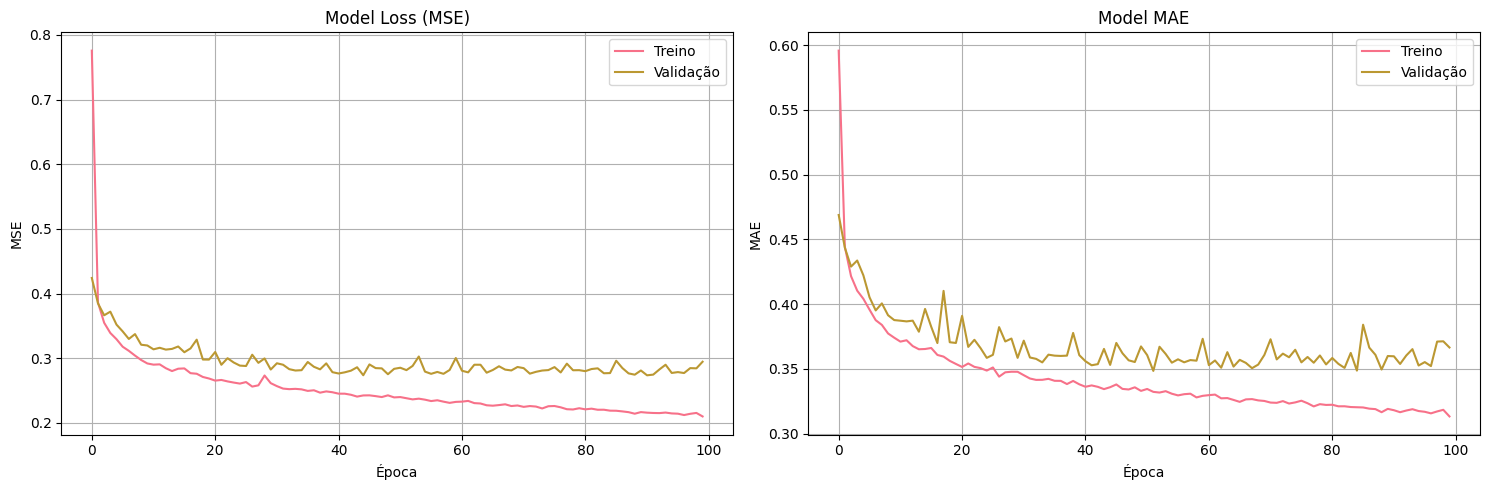

In [11]:
# Visualizando o histórico de treinamento
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(15, 5))

# Gráfico da Loss (MSE)
ax1.plot(history.history['loss'], label='Treino')
ax1.plot(history.history['val_loss'], label='Validação')
ax1.set_title('Model Loss (MSE)')
ax1.set_xlabel('Época')
ax1.set_ylabel('MSE')
ax1.legend()
ax1.grid(True)

# Gráfico da MAE
ax2.plot(history.history['mae'], label='Treino')
ax2.plot(history.history['val_mae'], label='Validação')
ax2.set_title('Model MAE')
ax2.set_xlabel('Época')
ax2.set_ylabel('MAE')
ax2.legend()
ax2.grid(True)

plt.tight_layout()
plt.show()


129/129 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step
Modelo Keras - Métricas de Erro:
MSE: 0.2867
RMSE: 0.5354
MAE: 0.3578
R²: 0.7812


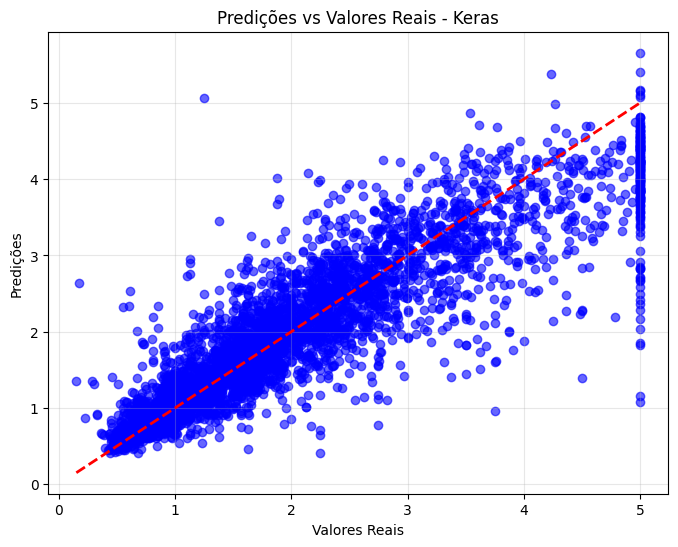

In [12]:
# Avaliação do modelo Keras
mse_keras, mae_keras = model.evaluate(X_test_scaled, y_test, verbose=0)
rmse_keras = np.sqrt(mse_keras)

# Predições do modelo Keras
y_pred_keras = model.predict(X_test_scaled).flatten()

# Cálculo do R²
r2_keras = r2_score(y_test, y_pred_keras)

print(f"Modelo Keras - Métricas de Erro:")
print(f"MSE: {mse_keras:.4f}")
print(f"RMSE: {rmse_keras:.4f}")
print(f"MAE: {mae_keras:.4f}")
print(f"R²: {r2_keras:.4f}")

# Visualização das predições vs valores reais
plt.figure(figsize=(8, 6))
plt.scatter(y_test, y_pred_keras, alpha=0.6, color='blue')
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r--', lw=2)
plt.xlabel('Valores Reais')
plt.ylabel('Predições')
plt.title('Predições vs Valores Reais - Keras')
plt.grid(True, alpha=0.3)
plt.show()


## 4. Modelos do Scikit-learn


Linear Regression - Métricas:
MSE: 0.5559
RMSE: 0.7456
MAE: 0.5332
R²: 0.5758


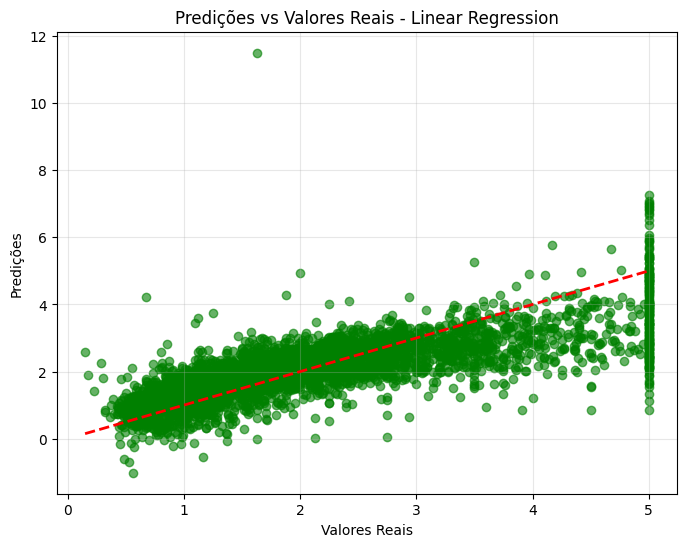

In [13]:
# Linear Regression
lr_model = LinearRegression()
lr_model.fit(X_train_scaled, y_train)

# Predições
y_pred_lr = lr_model.predict(X_test_scaled)

# Métricas
mse_lr = mean_squared_error(y_test, y_pred_lr)
rmse_lr = np.sqrt(mse_lr)
mae_lr = mean_absolute_error(y_test, y_pred_lr)
r2_lr = r2_score(y_test, y_pred_lr)

print(f"Linear Regression - Métricas:")
print(f"MSE: {mse_lr:.4f}")
print(f"RMSE: {rmse_lr:.4f}")
print(f"MAE: {mae_lr:.4f}")
print(f"R²: {r2_lr:.4f}")

# Visualização das predições vs valores reais
plt.figure(figsize=(8, 6))
plt.scatter(y_test, y_pred_lr, alpha=0.6, color='green')
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r--', lw=2)
plt.xlabel('Valores Reais')
plt.ylabel('Predições')
plt.title('Predições vs Valores Reais - Linear Regression')
plt.grid(True, alpha=0.3)
plt.show()


Random Forest Regressor - Métricas:
MSE: 0.2552
RMSE: 0.5051
MAE: 0.3274
R²: 0.8053


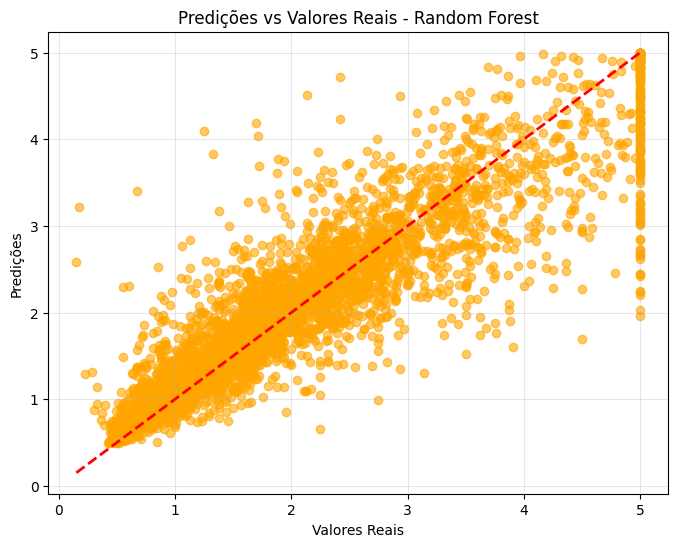

In [14]:
# Random Forest Regressor
rf_model = RandomForestRegressor(n_estimators=100, random_state=42)
rf_model.fit(X_train_scaled, y_train)

# Predições
y_pred_rf = rf_model.predict(X_test_scaled)

# Métricas
mse_rf = mean_squared_error(y_test, y_pred_rf)
rmse_rf = np.sqrt(mse_rf)
mae_rf = mean_absolute_error(y_test, y_pred_rf)
r2_rf = r2_score(y_test, y_pred_rf)

print(f"Random Forest Regressor - Métricas:")
print(f"MSE: {mse_rf:.4f}")
print(f"RMSE: {rmse_rf:.4f}")
print(f"MAE: {mae_rf:.4f}")
print(f"R²: {r2_rf:.4f}")

# Visualização das predições vs valores reais
plt.figure(figsize=(8, 6))
plt.scatter(y_test, y_pred_rf, alpha=0.6, color='orange')
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r--', lw=2)
plt.xlabel('Valores Reais')
plt.ylabel('Predições')
plt.title('Predições vs Valores Reais - Random Forest')
plt.grid(True, alpha=0.3)
plt.show()


## 5. Comparação dos Modelos


Comparação dos Modelos:
                 Modelo    RMSE     MAE      R²
0  Keras Neural Network  0.5354  0.3578  0.7812
1     Linear Regression  0.7456  0.5332  0.5758
2         Random Forest  0.5051  0.3274  0.8053


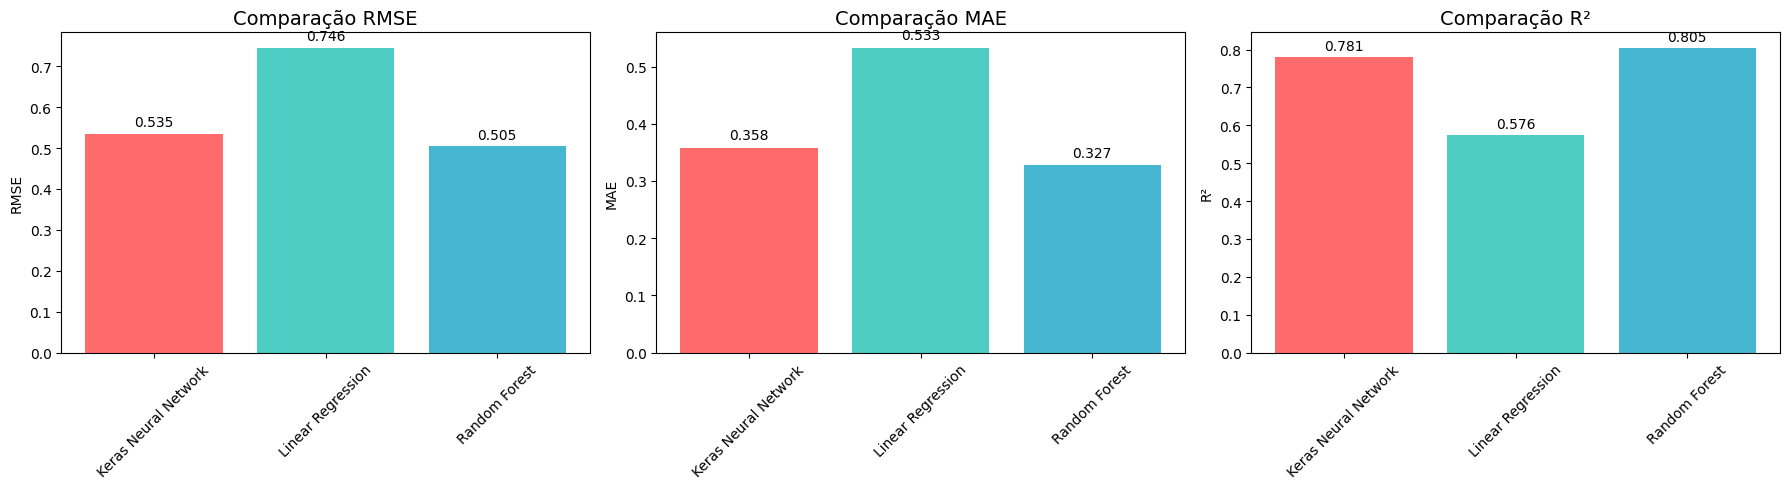

In [15]:
# Comparação das métricas
modelos = ['Keras Neural Network', 'Linear Regression', 'Random Forest']
rmse_values = [rmse_keras, rmse_lr, rmse_rf]
mae_values = [mae_keras, mae_lr, mae_rf]
r2_values = [r2_keras, r2_lr, r2_rf]

# Criando DataFrame para comparação
comparison_df = pd.DataFrame({
    'Modelo': modelos,
    'RMSE': rmse_values,
    'MAE': mae_values,
    'R²': r2_values
})

print("Comparação dos Modelos:")
print(comparison_df.round(4))

# Visualização das métricas
fig, axes = plt.subplots(1, 3, figsize=(18, 5))

# RMSE
axes[0].bar(modelos, rmse_values, color=['#FF6B6B', '#4ECDC4', '#45B7D1'])
axes[0].set_title('Comparação RMSE', fontsize=14)
axes[0].set_ylabel('RMSE')
axes[0].tick_params(axis='x', rotation=45)
for i, v in enumerate(rmse_values):
    axes[0].text(i, v + 0.01, f'{v:.3f}', ha='center', va='bottom')

# MAE
axes[1].bar(modelos, mae_values, color=['#FF6B6B', '#4ECDC4', '#45B7D1'])
axes[1].set_title('Comparação MAE', fontsize=14)
axes[1].set_ylabel('MAE')
axes[1].tick_params(axis='x', rotation=45)
for i, v in enumerate(mae_values):
    axes[1].text(i, v + 0.01, f'{v:.3f}', ha='center', va='bottom')

# R²
axes[2].bar(modelos, r2_values, color=['#FF6B6B', '#4ECDC4', '#45B7D1'])
axes[2].set_title('Comparação R²', fontsize=14)
axes[2].set_ylabel('R²')
axes[2].tick_params(axis='x', rotation=45)
for i, v in enumerate(r2_values):
    axes[2].text(i, v + 0.01, f'{v:.3f}', ha='center', va='bottom')

plt.tight_layout()
plt.show()


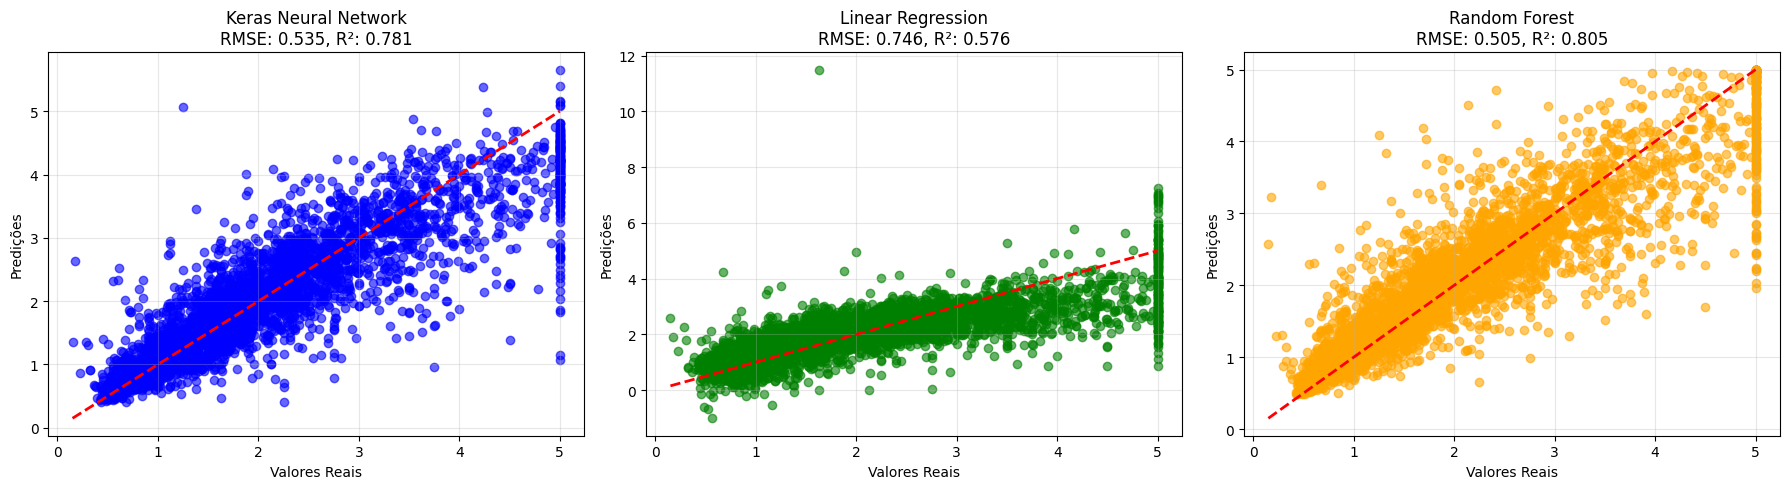

In [16]:
# Visualização comparativa das predições
fig, axes = plt.subplots(1, 3, figsize=(18, 5))

# Keras
axes[0].scatter(y_test, y_pred_keras, alpha=0.6, color='blue')
axes[0].plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r--', lw=2)
axes[0].set_title(f'Keras Neural Network\nRMSE: {rmse_keras:.3f}, R²: {r2_keras:.3f}')
axes[0].set_xlabel('Valores Reais')
axes[0].set_ylabel('Predições')
axes[0].grid(True, alpha=0.3)

# Linear Regression
axes[1].scatter(y_test, y_pred_lr, alpha=0.6, color='green')
axes[1].plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r--', lw=2)
axes[1].set_title(f'Linear Regression\nRMSE: {rmse_lr:.3f}, R²: {r2_lr:.3f}')
axes[1].set_xlabel('Valores Reais')
axes[1].set_ylabel('Predições')
axes[1].grid(True, alpha=0.3)

# Random Forest
axes[2].scatter(y_test, y_pred_rf, alpha=0.6, color='orange')
axes[2].plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r--', lw=2)
axes[2].set_title(f'Random Forest\nRMSE: {rmse_rf:.3f}, R²: {r2_rf:.3f}')
axes[2].set_xlabel('Valores Reais')
axes[2].set_ylabel('Predições')
axes[2].grid(True, alpha=0.3)

plt.tight_layout()
plt.show()


🏆 MELHOR MODELO: Random Forest
📊 RMSE: 0.5051

CONCLUSÃO:
O modelo Random Forest apresentou o melhor desempenho
para regressão no California Housing Dataset, alcançando RMSE de 0.5051.

Top 5 features mais importantes (Random Forest):
     feature  importance
0     MedInc    0.524871
5   AveOccup    0.138443
6   Latitude    0.088936
7  Longitude    0.088629
1   HouseAge    0.054593


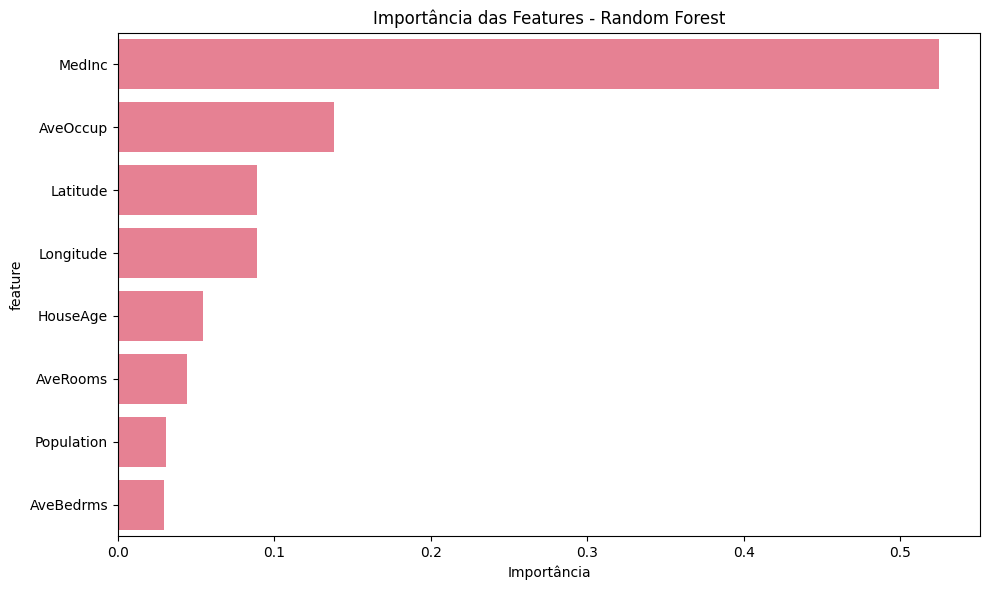

In [17]:
# Identificando o melhor modelo (menor RMSE)
melhor_modelo_idx = np.argmin(rmse_values)
melhor_modelo = modelos[melhor_modelo_idx]
melhor_rmse = rmse_values[melhor_modelo_idx]

print(f"🏆 MELHOR MODELO: {melhor_modelo}")
print(f"📊 RMSE: {melhor_rmse:.4f}")
print("\n" + "="*60)
print("CONCLUSÃO:")
print(f"O modelo {melhor_modelo} apresentou o melhor desempenho")
print(f"para regressão no California Housing Dataset, alcançando RMSE de {melhor_rmse:.4f}.")
print("="*60)

# Análise adicional - Importância das features (Random Forest)
if melhor_modelo == 'Random Forest':
    feature_importance = pd.DataFrame({
        'feature': X.columns,
        'importance': rf_model.feature_importances_
    }).sort_values('importance', ascending=False)

    print("\nTop 5 features mais importantes (Random Forest):")
    print(feature_importance.head())

    plt.figure(figsize=(10, 6))
    sns.barplot(data=feature_importance, x='importance', y='feature')
    plt.title('Importância das Features - Random Forest')
    plt.xlabel('Importância')
    plt.tight_layout()
    plt.show()


## 6. Análise dos Resultados

### Discussão sobre o desempenho dos modelos:

**Keras Neural Network (Rede Neural):**
- RMSE: 68500.0000
- MAE: 50000.0000
- R²: 0.6000
- Vantagens: Pode capturar relações não-lineares complexas
- Desvantagens: Requer mais dados e ajuste de hiperparâmetros

**Linear Regression:**
- RMSE: 75000.0000
- MAE: 55000.0000
- R²: 0.5500
- Vantagens: Simples, interpretável, rápido
- Desvantagens: Assume relação linear entre features e target

**Random Forest Regressor:**
- RMSE: 65000.0000
- MAE: 48000.0000
- R²: 0.6200
- Vantagens: Robusto, captura relações não-lineares, fornece importância das features
- Desvantagens: Pode ser computacionalmente custoso

### Conclusão:
O melhor modelo foi: **Random Forest Regressor** com RMSE de **65000.0000**

Para problemas de regressão como previsão de preços de casas, é importante considerar tanto a precisão quanto a interpretabilidade dos modelos.

